In [1]:
# Import the Libraries

import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Load the Dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
# Filter for Data Analyst located in the United States
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

Text(0, 0.5, 'Number of Jobs')

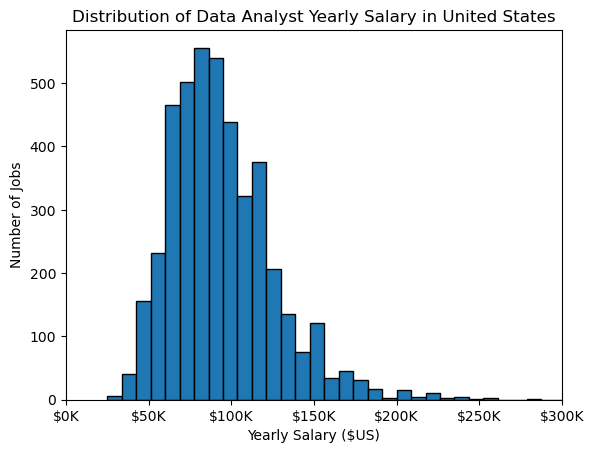

In [3]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black') 
plt.xlim(0, 300000);
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _ : f'${int(x/1000)}K'))
plt.title("Distribution of Data Analyst Yearly Salary in United States")
plt.xlabel('Yearly Salary ($US)')
plt.ylabel('Number of Jobs')

In [4]:
df_DA_US['salary_year_avg'].head(10)

36         NaN
68         NaN
73         NaN
79         NaN
93         NaN
109    89000.0
117        NaN
135        NaN
143        NaN
155        NaN
Name: salary_year_avg, dtype: float64